<center><h1> Training Autoencoder </h1>
John Ignacio R.M. Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import read_dataset, split_dataset, AutoencoderModelV2 as A2
import pandas as pd

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
source_path = "../../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

# Tag 2

In [3]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 2)
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.130367,0.444366,-0.742402,-1.667881,-0.481700,-0.821738,0.986630,-0.707962,0.286199,-0.060604,-0.308809,1.122165,-0.536045,0.343074
1,-0.154324,-0.757036,-1.493544,-0.589215,0.568245,-0.957618,0.263328,-0.190632,0.639077,-0.390635,-0.565153,-0.441870,-0.438832,-0.838744
2,0.909062,-0.559545,-1.666243,1.438288,0.033011,0.764030,0.097340,-0.283146,0.723747,0.299002,0.002110,0.820174,0.623691,0.595543
3,0.198608,-0.114302,1.325361,0.481073,0.195452,-1.168931,-0.468388,-0.280492,-0.281793,-0.609963,0.190788,1.189810,-0.078685,-0.048231
4,0.395712,-0.212834,-1.236288,-0.036609,-0.663686,0.235153,0.669041,-0.908677,-0.627592,-1.114341,0.051936,1.887263,-1.088247,0.856897


In [4]:
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(5283, 14) (1761, 14) (1762, 14)


In [5]:
#dividing the classes
x_train_0 = x_train[y_train == 0]
x_train_1 = x_train[y_train == 1]
w_train_0 = w_train[(y_train == 0).ravel()]
w_train_1 = w_train[(y_train == 1).ravel()]

x_val_0 = x_val[y_val == 0]
x_val_1 = x_val[y_val == 1]
w_val_0 = w_val[(y_val == 0).ravel()]
w_val_1 = w_val[(y_val == 1).ravel()]

x_test_0 = x_test[y_test == 0]
x_test_1 = x_test[y_test == 1]
w_test_0 = w_test[(y_test == 0).ravel()]
w_test_1 = w_test[(y_test == 1).ravel()]

In [14]:
a1_tag2 = A1(x_train_1.shape[1])
a1_tag2.fit(x_train_1, w_train_1, x_val_1, w_val_1, 50)

Train on 5123 samples, validate on 1721 samples
Epoch 1/50
5123/5123 [==============================] - 1s 161us/step - loss: 0.0011 - val_loss: 9.7205e-04
Epoch 2/50
5123/5123 [==============================] - 1s 112us/step - loss: 0.0010 - val_loss: 9.5771e-04
Epoch 3/50
5123/5123 [==============================] - 1s 112us/step - loss: 0.0010 - val_loss: 9.5488e-04
Epoch 4/50
5123/5123 [==============================] - 1s 109us/step - loss: 0.0010 - val_loss: 9.4953e-04
Epoch 5/50
5123/5123 [==============================] - 1s 108us/step - loss: 0.0010 - val_loss: 9.4957e-04
Epoch 6/50
5123/5123 [==============================] - 1s 112us/step - loss: 9.9819e-04 - val_loss: 9.4652e-04
Epoch 7/50
5123/5123 [==============================] - 1s 114us/step - loss: 9.9553e-04 - val_loss: 9.4395e-04
Epoch 8/50
5123/5123 [==============================] - 1s 117us/step - loss: 9.9474e-04 - val_loss: 9.4040e-04
Epoch 9/50
5123/5123 [==============================] - 1s 122us/step - loss

In [8]:
#a1_tag2.save("../../saved_models", "tag2_jun_2020")

In [6]:
a1_tag2 = A1(sets["x"]["test"].shape[1], 0)
a1_tag2.load("../../saved_models", "tag2_jun_2020")

2020-06-24 17:06:26.649662: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-24 17:06:26.663066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-24 17:06:26.663370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-24 17:06:26.663437: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-24 17:06:26.663493: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-24 17:06:26.664980: I tensorflow/stream_executor/platform/def

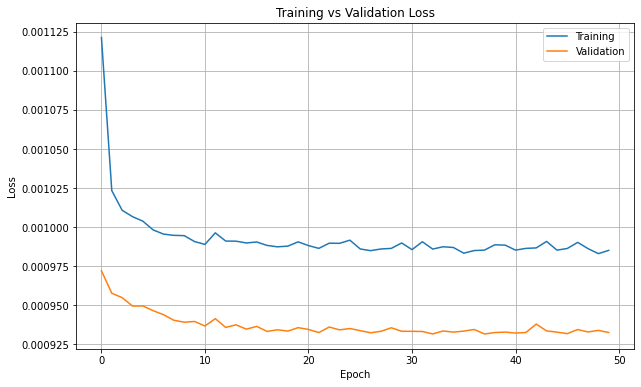

In [7]:
a1_tag2.plot_loss()

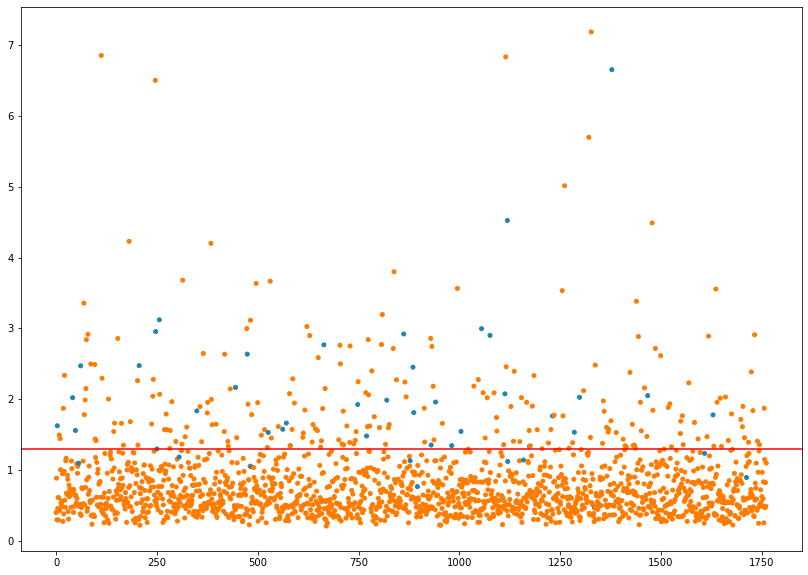

2020-06-24 17:06:45.515630: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


In [8]:
a1_tag2.plot_reconstruction_error(x_test, y_test, 1.3)

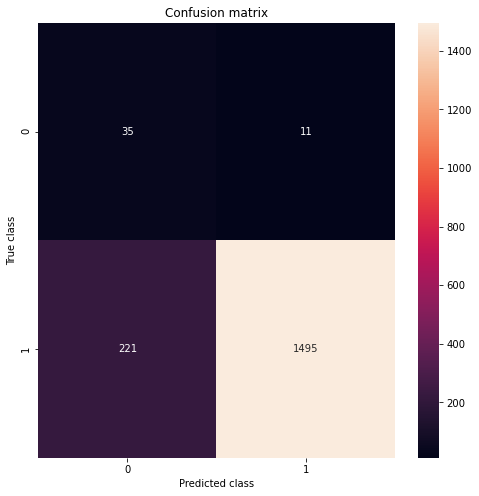

In [9]:
a1_tag2.plot_confidence_matrix(x_test, y_test, 1.3, "d")